# TME1 - Arbres de décision, sélection de modèles

## Exercice 1 - Entropie

**Q1.1** 

In [ ]:
import numpy as np

def entropie(vect):
    return -np.sum(vect * np.log(vect))

In [ ]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

# fields : id feature -> nom
[data, id2titles, fields] = pickle.load(open("imdb_extrait.pkl" , "rb"))
# la derniere colonne est le vote
datax = data[: , :32]
datay = np.array([1 if x [33] > 6.5 else -1 for x in data])


## Quelques expériences préliminaires

0.736647045999564


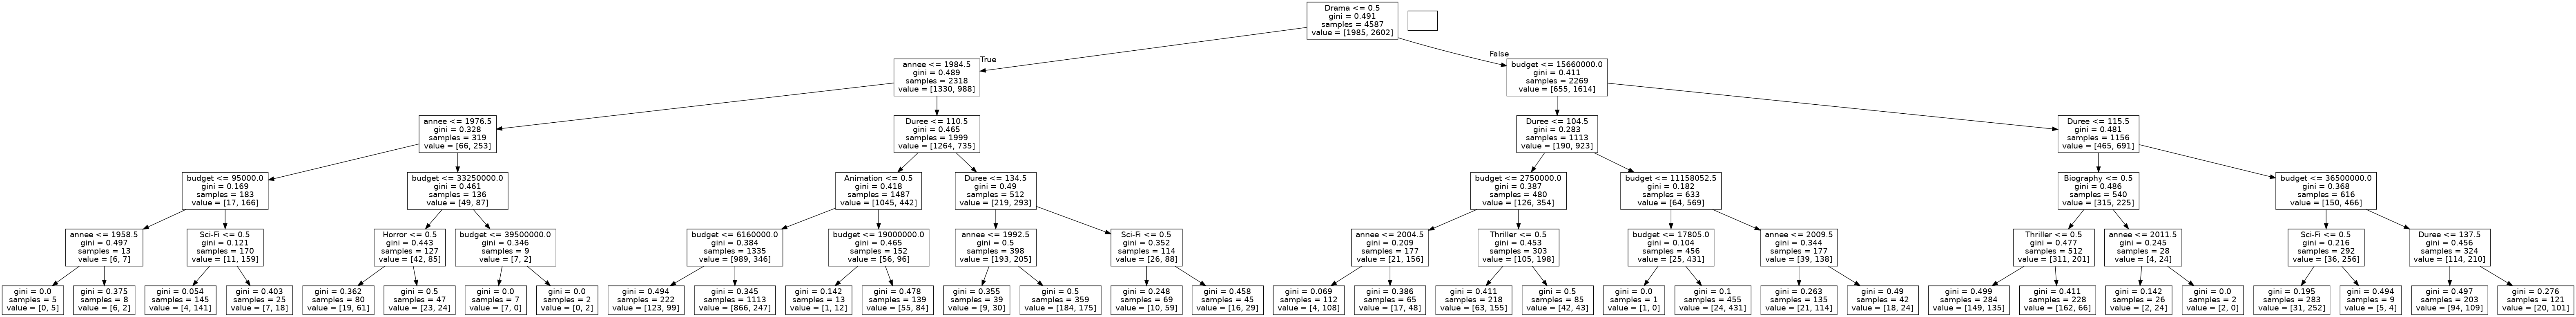

In [ ]:
from IPython.display import Image 
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier as DTree
import pydotplus

id2genre = [ x [1] for x in sorted ( fields.items ())[: -2]]
dt = DTree ()
dt.max_depth = 5 # on fixe la taille max de l'arbre a 5
dt.min_samples_split = 2 # nombre minimum d'exemples pour spliter un noeud
dt.fit(datax, datay)
dt.predict(datax[:5 ,:])
print(dt.score(datax, datay ))
# utiliser http://www.webgraphviz.com ou https://dreampuf.github.io/GraphvizOnline/
# export_graphviz(dt, out_file = "/tmp/tree.dot", feature_names = id2genre)
# ou avec pydotplus
tdot = export_graphviz ( dt , feature_names = id2genre )
graph = pydotplus.graph_from_dot_data(tdot)
Image(graph.create_png())

0.6825812077610639


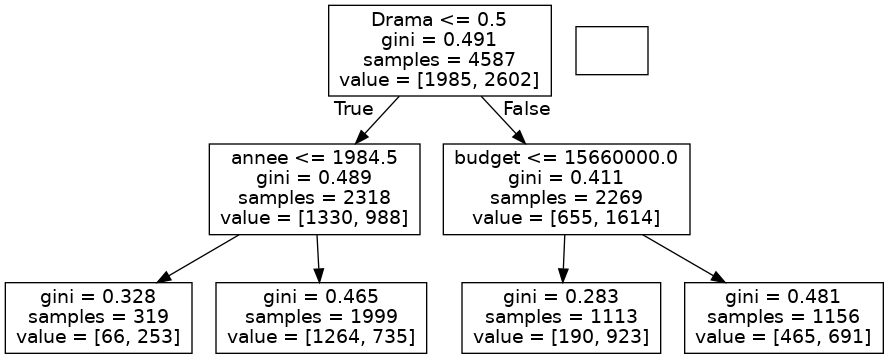

In [ ]:
dt = DTree (max_depth=2, min_samples_split = 2)
dt.max_depth = 2 # on fixe la taille max de l'arbre a 5
dt.min_samples_split = 2 # nombre minimum d'exemples pour spliter un noeud
dt.fit(datax, datay)
dt.predict(datax[:5 ,:])
print(dt.score(datax, datay ))
tdot = export_graphviz ( dt , feature_names = id2genre )
graph = pydotplus.graph_from_dot_data(tdot)
Image(graph.create_png())

0.6418138216699367


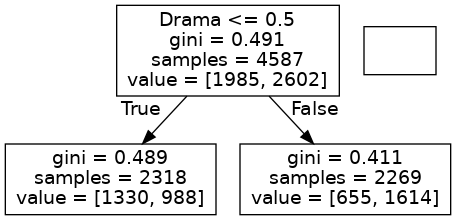

In [ ]:
dt = DTree ()
dt.max_depth = 2 # on fixe la taille max de l'arbre a 5
dt.min_samples_split = 2500 # nombre minimum d'exemples pour spliter un noeud
dt.fit(datax, datay)
dt.predict(datax[:5 ,:])
print(dt.score(datax, datay ))
tdot = export_graphviz ( dt , feature_names = id2genre )
graph = pydotplus.graph_from_dot_data(tdot)
Image(graph.create_png())

0.6418138216699367


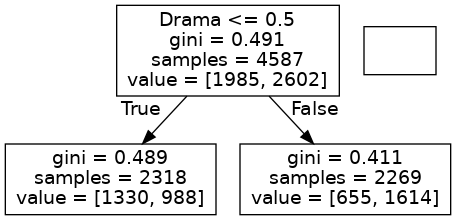

In [ ]:
dt = DTree ()
dt.max_depth = 1 # on fixe la taille max de l'arbre a 5
dt.min_samples_split = 2 # nombre minimum d'exemples pour spliter un noeud
dt.fit(datax, datay)
dt.predict(datax[:5 ,:])
print(dt.score(datax, datay ))
tdot = export_graphviz ( dt , feature_names = id2genre )
graph = pydotplus.graph_from_dot_data(tdot)
Image(graph.create_png())

0.7325049051667757


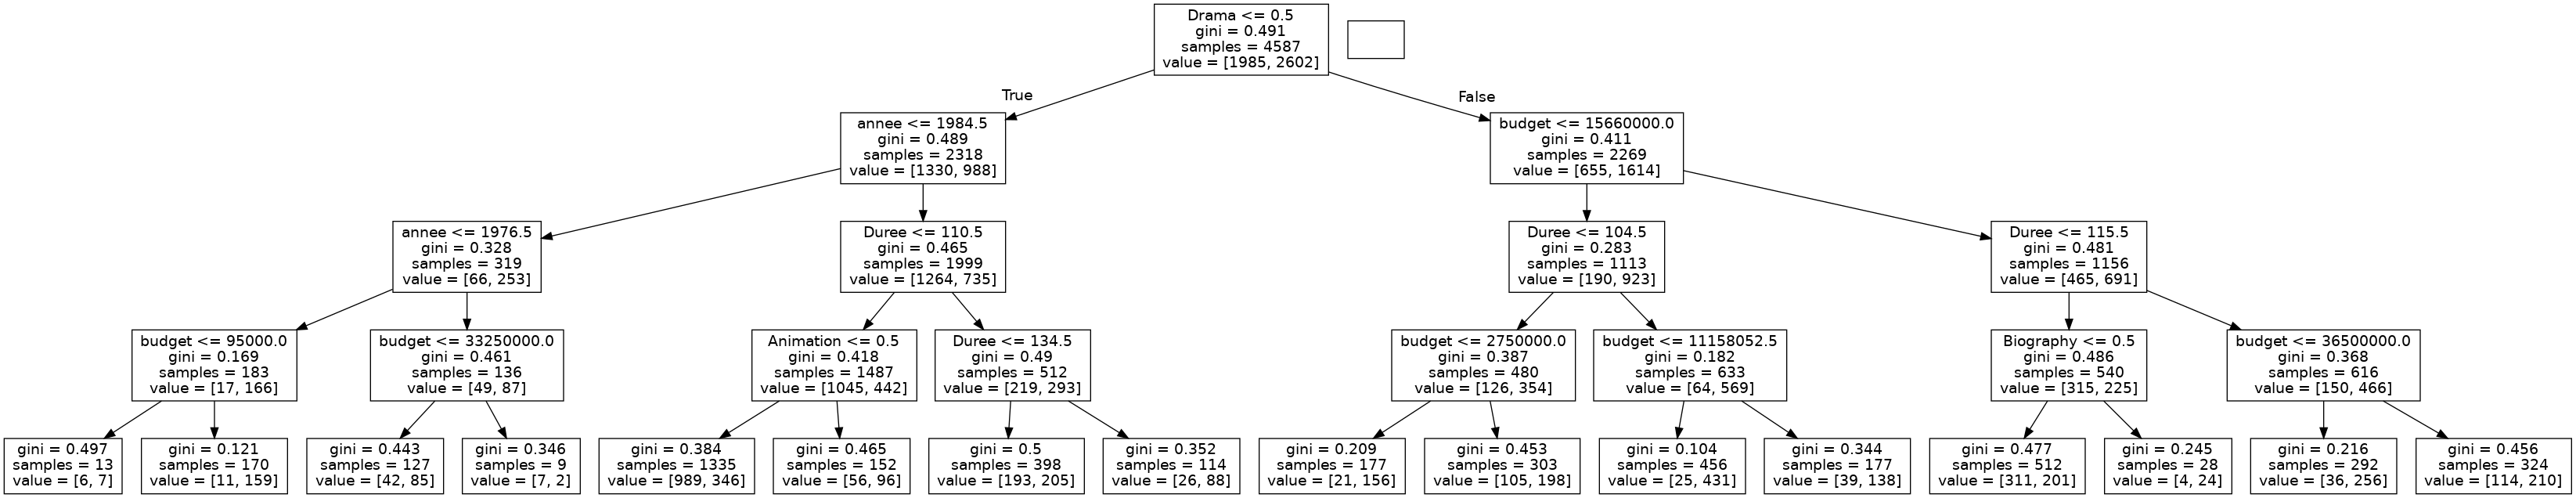

In [ ]:
dt = DTree ()
dt.max_depth = 4 # on fixe la taille max de l'arbre a 5
dt.min_samples_split = 2 # nombre minimum d'exemples pour spliter un noeud
dt.fit(datax, datay)
dt.predict(datax[:5 ,:])
print(dt.score(datax, datay ))
tdot = export_graphviz ( dt , feature_names = id2genre )
graph = pydotplus.graph_from_dot_data(tdot)
Image(graph.create_png())

In [ ]:
acc = []
for i in range(1, 51):
    dt = DTree()
    dt.max_depth = i
    dt.min_samples_split = 2
    dt.fit(datax, datay)
    dt.predict(datax[:5 ,:])
    acc.append(dt.score(datax, datay))

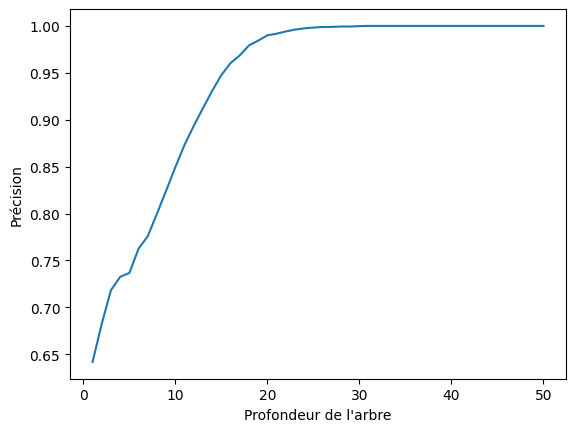

In [ ]:
plt.plot(range(1, 51), acc)
plt.xlabel("Profondeur de l'arbre")
plt.ylabel("Précision")
plt.show()

## Sur et sous apprentissage

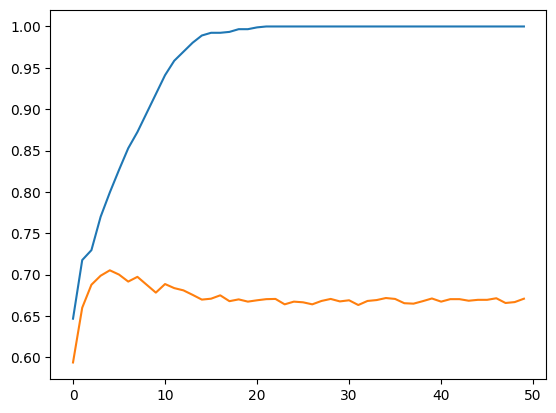

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(datax, datay, test_size=0.8, random_state=1)
acc_test = []
acc_train = []
for i in range(1, 51):
    dt = DTree()
    dt.max_depth = i
    dt.min_samples_split = 2
    dt.fit(x_train, y_train)
    # dt.predict(datax[:5 ,:])
    acc_train.append(dt.score(x_train, y_train))
    acc_test.append(dt.score(x_test, y_test))
    
plt.plot(acc_train)
plt.plot(acc_test)
plt.show()

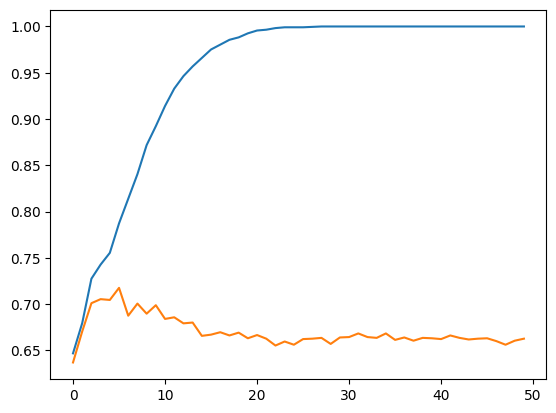

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(datax, datay, test_size=0.5, random_state=1)
acc_test = []
acc_train = []
for i in range(1, 51):
    dt = DTree()
    dt.max_depth = i
    dt.min_samples_split = 2
    dt.fit(x_train, y_train)
    acc_train.append(dt.score(x_train, y_train))
    acc_test.append(dt.score(x_test, y_test))
    
plt.plot(acc_train)
plt.plot(acc_test)
plt.show()

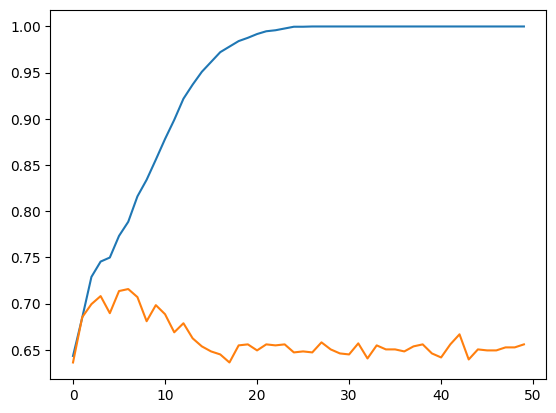

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(datax, datay, test_size=0.2, random_state=1)
acc_test = []
acc_train = []
for i in range(1, 51):
    dt = DTree()
    dt.max_depth = i
    dt.min_samples_split = 2
    dt.fit(x_train, y_train)
    acc_train.append(dt.score(x_train, y_train))
    acc_test.append(dt.score(x_test, y_test))
    
plt.plot(acc_train)
plt.plot(acc_test)
plt.show()

In [ ]:
from sklearn import svm
from sklearn.model_selection import cross_val_score

acc_cv = []
for i in range(1,51):
    dt = DTree()
    dt.max_depth = i
    dt.min_samples_split = 2
    scores = cross_val_score(dt, datax, datay, cv=5)
    acc_cv.append(scores)


In [ ]:
print(f"le modèle minimisant l'erreur est de profondeur {np.argmax(np.mean(acc_cv, axis=1))+1}")
print(np.mean(acc_cv, axis=1)[6], np.std(acc_cv, axis=1)[6])

le modèle minimisant l'erreur est de profondeur 7
0.723131220257399 0.003249500593466421


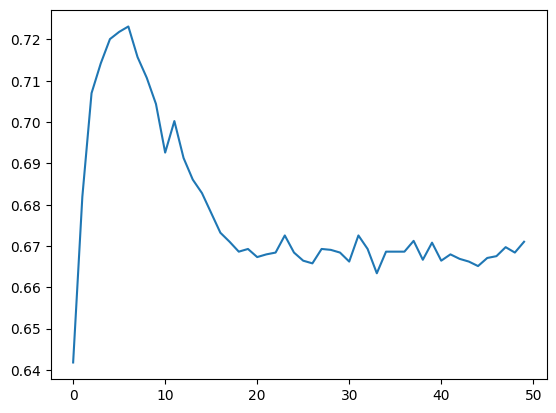

In [ ]:
plt.plot(np.mean(acc_cv, axis=1))

In [ ]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.71 accuracy with a standard deviation of 0.01
